In [1]:
import pandas as pd

data = pd.read_json("~/code/DataForGood/Hackathon_Tournesol/video_theme_sentiment/data/all-videos-with-transcripts-and-tokens-fr.json")
data.head()

results  count next previous
0  {'tournesol_score': 0, 'type': 'video', 'uid':...  22432              
1  {'tournesol_score': 0, 'type': 'video', 'uid':...  22432              
2  {'tournesol_score': 10.794439223323227, 'type'...  22432              
3  {'tournesol_score': 0.7006518881003181, 'type'...  22432              
4  {'tournesol_score': -4.59370239761854, 'type':...  22432

In [2]:
data.shape

(15077, 4)

In [3]:
data.isnull().sum()

results     0
count       0
next        0
previous    0
dtype: int64

In [4]:
data.results

0        {'tournesol_score': 0, 'type': 'video', 'uid':...
1        {'tournesol_score': 0, 'type': 'video', 'uid':...
2        {'tournesol_score': 10.794439223323227, 'type'...
3        {'tournesol_score': 0.7006518881003181, 'type'...
4        {'tournesol_score': -4.59370239761854, 'type':...
                               ...                        
15072    {'tournesol_score': -55.421492900447596, 'type...
15073    {'tournesol_score': 6.849488375549023, 'type':...
15074    {'tournesol_score': 0, 'type': 'video', 'uid':...
15075    {'tournesol_score': 0, 'type': 'video', 'uid':...
15076    {'tournesol_score': -6.159323987888518, 'type'...
Name: results, Length: 15077, dtype: object

In [5]:
data.results[1].keys()

dict_keys(['tournesol_score', 'type', 'uid', 'metadata', 'polls'])

In [6]:
data.results[1]['metadata']['tags']

['kepler',
 'orbites',
 'lois',
 'lois de kepler',
 'loi des aires',
 'période',
 'orbite']

In [7]:
data.results[1]['metadata']

{'channel_id': 'UCV6uM3y-8TeO7JlCtcEN-Bg',
 'description': "Quelle forme prennent les orbites des planètes autour du Soleil ? Comment change la vitesse d'une planète sur sa trajectoire, et combien de temps met-elle à en faire le tour ? Toutes ces réponses en 5 minutes !\r\n\r\nSi vous voulez voir d'autres vidéos, n'hésitez pas à vous abonner à la chaîne YouTube : http://youtube.com/ScienceClic\r\nEt si cette vidéo vous a plu, vous pouvez la partager sur les réseaux sociaux !\r\n\r\nPour me soutenir sur Tipeee : http://tipeee.com/ScienceClic\r\nou gratuitement sur uTip : http://utip.io/ScienceClic\r\n\r\nPage Facebook : http://facebook.com/ScienceClic\r\nTwitter : http://twitter.com/ScienceClic\r\nGoogle+ : http://google.com/+ScienceClic\r\n\r\nAlessandro Roussel,\r\nPour plus d'informations: http://www.alessandroroussel.com\r\n\r\n_________________________________________________\r\nPour en savoir plus :\nhttps://fr.wikipedia.org/wiki/Lois_de_Kepler\nhttps://en.wikipedia.org/wiki/Keple

In [8]:
tags_counts = []
for i in data.results:
    
    # Compter le nombre de tags pour chaque vidéo
    tags_count = len(i['metadata']['tags'])
    # Ajouter ce nb à une liste de décomptes de tags
    tags_counts.append(tags_count)
    
# DataFrame des nb de tags par video
df = pd.DataFrame({'Nombre de tags': tags_counts})
df.shape   

(15077, 1)

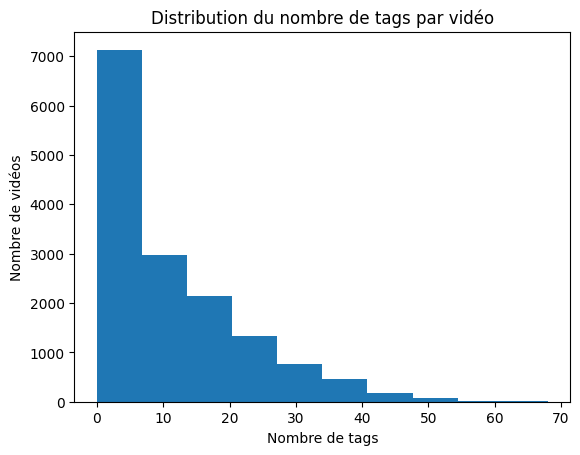

In [9]:
import matplotlib.pyplot as plt

# histogramme des nombres de tags
plt.hist(df['Nombre de tags'])

plt.title("Distribution du nombre de tags par vidéo")
plt.xlabel("Nombre de tags")
plt.ylabel("Nombre de vidéos")

plt.show()

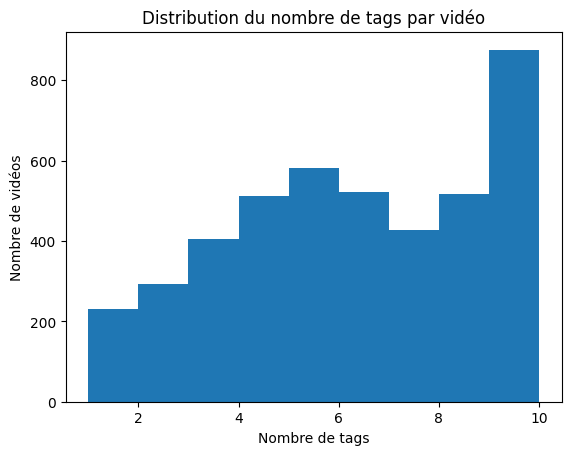

In [10]:
plt.hist(df['Nombre de tags'], bins=range(1,11))

plt.title("Distribution du nombre de tags par vidéo")
plt.xlabel("Nombre de tags")
plt.ylabel("Nombre de vidéos")

plt.show()

In [11]:
token_counts = []
for i in data.results:
    if i['metadata']['tokens'] is not None:
        unique_words = set(token['Text'] for token in i['metadata']['tokens'])
        num_unique_words = len(unique_words)
        token_counts.append(num_unique_words)
    
df_token1 = pd.DataFrame({'Nombre de tokens': token_counts})
df_token1.shape

(13641, 1)

In [12]:
token_counts = []
for i in data.results:
    if i['metadata']['tokens'] is not None:
        # Compter le nombre de tokens pour chaque vidéo
        token_count = len(i['metadata']['tokens'])
        # Ajouter ce nb à une liste de décomptes de tokens
        token_counts.append(token_count)
    
# DataFrame des nb de tags par video
df_token2 = pd.DataFrame({'Nombre de tokens': token_counts})
df_token2.shape

(13641, 1)

In [13]:
df_token1.head()

Nombre de tokens
0                52
1                78
2               108
3               181
4               214

In [14]:
df_token2.head()

Nombre de tokens
0                52
1                78
2               108
3               181
4               214

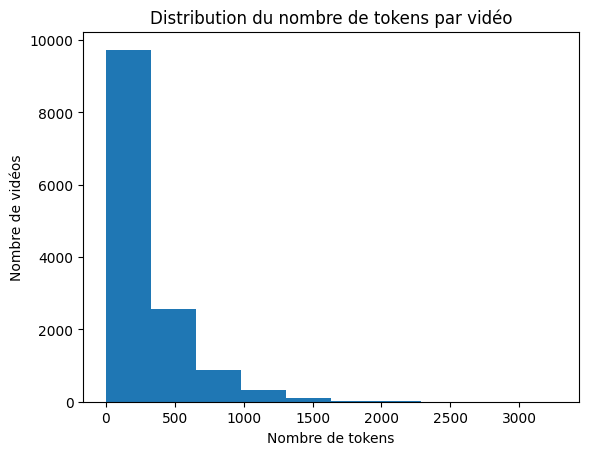

In [15]:
# histogramme des nombres de tokens
plt.hist(df_token1)

plt.title("Distribution du nombre de tokens par vidéo")
plt.xlabel("Nombre de tokens")
plt.ylabel("Nombre de vidéos")

plt.show()

In [16]:
df.value_counts()

Nombre de tags
0                 4583
5                  582
6                  523
8                  516
4                  513
                  ... 
60                   2
64                   2
68                   2
61                   1
65                   1
Length: 64, dtype: int64

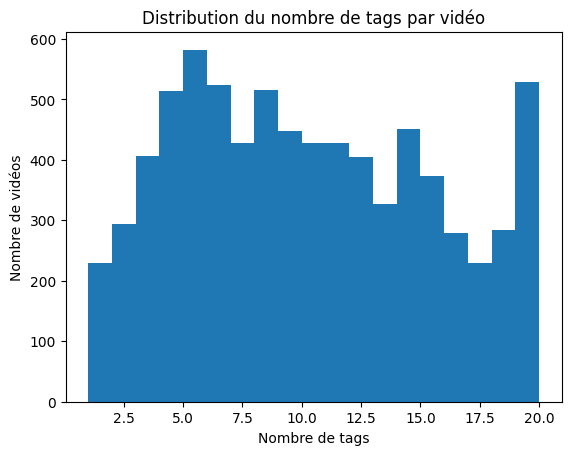

In [17]:
plt.hist(df['Nombre de tags'], bins=range(1, 21))

plt.title("Distribution du nombre de tags par vidéo")
plt.xlabel("Nombre de tags")
plt.ylabel("Nombre de vidéos")

plt.show()

In [18]:
df_token1.value_counts().sort_values(ascending=False)

Nombre de tokens
0                   62
52                  53
42                  53
19                  52
140                 52
                    ..
1380                 1
1727                 1
1382                 1
1374                 1
3270                 1
Length: 1286, dtype: int64

In [19]:
import re
import string
import unicodedata
!pip install nltk
from nltk.stem import WordNetLemmatizer

In [20]:
!pip install -U spacy
!python -m spacy download fr_core_news_sm

import spacy

def remove_stopwords(text):
    nlp = spacy.load('fr_core_news_sm')
    doc = nlp(text)
    text_without_stopwords = ' '.join([token.text for token in doc if not token.is_stop])
    return text_without_stopwords

def lemmatize_text(text):
    nlp = spacy.load("fr_core_news_sm")
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 3.8 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [21]:
def preprocess_new(text):
    # Conversion en minuscules
    text = text.lower()
    
    # Suppression des \n
    text = re.sub('\n', ' ', text)
    
    # Suppression 'musique' dans brackets 
    #text = re.sub('\[Musique', ' ', text)
    
    # Suppression des caractères spéciaux
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    # Suppression tags HTML
    text = re.sub('<.*?>+', ' ', text)
    
    # Supprimer les chiffres
    text = ''.join(char for char in text if not char.isdigit())
    
    # Remplace les mots contenant un chiffre par un espace
    #text = re.sub('\w*\d\w*', ' ', text)
    
    # Suppression texte entre brackets 
    text = re.sub('\[.*?\]', ' ', text)
    
    # tokenization et suppression des stopwords
    text_tokenized = remove_stopwords(text)
    print(text_tokenized)
    print(type(text_tokenized))
    
    # Suppression des mots de moins de 3 lettres
    text_tokenized_best = [word for word in text_tokenized.split(' ') if len(word) > 2]
    print(text_tokenized_best)
    #text_tokenized_final = ' '.join(text_tokenized_best)
    #print (text_tokenized_final)
    
    # lemmatisation
    text_lemmatized = [WordNetLemmatizer().lemmatize(word, pos = "v") for word in text_tokenized_best]
    
    return text_lemmatized

In [22]:
text_1 = data.results[1]['metadata']['transcripts']['fr']
text_1

"[Musique]\nbonjour à tous aujourd'hui dans science\nclic les lois de kepler dans notre\nunivers la gravitation force les objets\nà orbite et les uns autour des autres\nainsi les étoiles orbitant galaxie les\nplanètes orbitent autour des étoiles et\nles l'une autour des planètes les lois\nde kepler sont un ensemble de trois\nénoncés qui ont pour but de décrire la\ntrajectoire des astres autour d'un corps\ncentral ces lois sont très générale et\nfonctionne dès lors que l'on a un corps\nen orbite autour d'un astre mais pour\nles énoncés prenons le cas particulier\nd'une planète autour du soleil\nla première lois de kepler est la loi\ndes orbites\nelle nous dit que les planètes suivent\ndes trajectoires en ellipse autour du\nsoleil plus l'ellipse et étirez plus son\ncentre est décalée par rapport au soleil\non dit que la position du soleil\nconstitue l'un des deux foyers de\nl'ellipse le décalage entre le centre et\nle foyer est ce qu'on appelle\nl'excentricité de leurs beats les\nplanète

In [23]:
text_1_preprocessed_test = preprocess(text_1)
text_1_preprocessed_test

NameError: name 'preprocess' is not defined

In [33]:
len(text_1_preprocessed_test)

NameError: name 'text_1_preprocessed_test' is not defined

In [ ]:
text_1_cleaned_test = clean_text(text_1)
text_1_cleaned_test

In [ ]:
len(text_1_cleaned_test)

In [ ]:
text_1_preprocessed_test2 = preprocess_new(text_1)
text_1_preprocessed_test2

In [ ]:
len(text_1_preprocessed_test2)

In [34]:
!pip install unidecode
!pip install rake_nltk

In [35]:
import pandas as pd
import re
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
nltk.download('punkt')
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
import spacy
from spacy.lang.fr.examples import sentences 
from rake_nltk import Metric, Rake

[nltk_data] Downloading package punkt to /Users/davidr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

**Preprocessing**

In [37]:
def tokenize_text(liste):
    toknizer = RegexpTokenizer(r'''\w'|\w+|[^\w\s]''')
    list_token=[]
    for word in liste:
        token = str(toknizer.tokenize(word))
        word_tokens = word_tokenize(token, language='french')
        list_token.append(word_tokens)
    
    flat_list = [item for sublist in list_token for item in sublist]
        
    return flat_list

def remove_fr_punct(list_text):
    list_propre = []
    for word in list_text:
        word = unidecode(word)
        word = word.replace("'", ' ')
        #remove all letters alone
        word = ' '.join( [w for w in word.split() if len(w)>2] )
        list_propre.append(word)
        
    return list_propre

        


def text_clean(text):
    # lower word
    #lower = ' '.text.lower()
    lower = text.lower()
    
    #replace space
    no_tab = lower.replace('\n', ' ')
    
    #split words
    split_text = re.split('W+',no_tab)

    #tokenized
    token_text = tokenize_text(split_text)
    
    #remove punctuation
    no_punc = remove_fr_punct(token_text)
    
    #remove empty
    full_list = list(filter(None, no_punc))
    
    return (full_list)

**Stemming**

In [38]:
def stemming_word(text):
    #defining the object for stemming
    porter_stemmer = PorterStemmer()
    #defining a function for stemming
    
    stem_text = [porter_stemmer.stem(word) for word in text]

    return stem_text

**Lemmatization**

In [39]:
def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

**Stopwords**

In [40]:
def remove_stop(text):
    french_stop=list(fr_stop)
    clean_list = []
    for elem in text:
        if elem not in french_stop:
            clean_list.append(elem)
            
    return clean_list

In [41]:
def keep_noun(text):
    nlp = spacy.load("fr_core_news_sm")
    kept_tags = {"NOUN"}
    document = [line.strip() for line in text]
    best_word=[]
    for word in text:
        for token in nlp(word):
            
            if token.pos_ in kept_tags:
                
                best_word.append(token.text)
                
    return (best_word)

**Cleaning**

**Theme Extraction**

***Methode 1***

In [42]:
!pip install yake

In [43]:
def yake_test(text):
    import yake
    kw_extractor = yake.KeywordExtractor()
    language = "fr"
    max_ngram_size = 1
    deduplication_threshold = 0.9
    numOfKeywords = 20
    texte2=' '.join(text)
    
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
    
    keywords = custom_kw_extractor.extract_keywords(texte2)
    
    dico_res = dict(keywords)
    
    ranked_dico = {k: v for k, v in sorted(dico_res.items(), key=lambda item: item[1], reverse=True)}
        
    return ranked_dico

***Methode 2***

In [44]:
def tfidf (text):
    # Calculez la fréquence de chaque token dans le texte (TF)
    tf_scores = {}
    for token in text:

        if token in tf_scores:
            tf_scores[token] += 1
        else:
            tf_scores[token] = 1

    # Calculez l'importance inverse de chaque token dans la collection de documents (IDF)
    # Pour simplifier, nous allons supposer que nous avons seulement un document dans notre collection
    idf_scores = {token: 1 for token in set(text)}

    # Multipliez le TF et l'IDF de chaque token pour obtenir leur score TF-IDF
    tfidf_scores = {token: tf_scores[token] * idf_scores[token] for token in tf_scores}

    # Affichez les scores TF-IDF
    dico_res = {}
    for token, score in tf_scores.items():
        #print(f"Token: {token}, TF-IDF: {score}")
        dico_res[token] = score
    
    ranked_dico = {k: v for k, v in sorted(dico_res.items(), key=lambda item: item[1], reverse=True)}
    
    return ranked_dico

***Methode 3***

In [45]:
def rake_text(text):
    r = Rake(language='french')
    texte2=' '.join(noun_only)
    r.extract_keywords_from_text(texte2)
    ranked_phr=r.get_ranked_phrases()
    
    #print(ranked_phr)
    rake_yake = yake_test(ranked_phr)
    
    return(rake_yake)

***Attempts***

In [46]:
dicto=data['results'][1]

In [47]:
list(dicto.keys())

['tournesol_score', 'type', 'uid', 'metadata', 'polls']

In [48]:
text=dicto["metadata"]["transcripts"]["fr"]
print(text)

[Musique]
bonjour à tous aujourd'hui dans science
clic les lois de kepler dans notre
univers la gravitation force les objets
à orbite et les uns autour des autres
ainsi les étoiles orbitant galaxie les
planètes orbitent autour des étoiles et
les l'une autour des planètes les lois
de kepler sont un ensemble de trois
énoncés qui ont pour but de décrire la
trajectoire des astres autour d'un corps
central ces lois sont très générale et
fonctionne dès lors que l'on a un corps
en orbite autour d'un astre mais pour
les énoncés prenons le cas particulier
d'une planète autour du soleil
la première lois de kepler est la loi
des orbites
elle nous dit que les planètes suivent
des trajectoires en ellipse autour du
soleil plus l'ellipse et étirez plus son
centre est décalée par rapport au soleil
on dit que la position du soleil
constitue l'un des deux foyers de
l'ellipse le décalage entre le centre et
le foyer est ce qu'on appelle
l'excentricité de leurs beats les
planètes dans notre système solaire

In [49]:
test=text_clean(text)
stemmed=stemming_word(test)
lemm= lemmatizer(stemmed)
clean_lemm = remove_stop(lemm)
noun_only = keep_noun(clean_lemm)

In [50]:
print(noun_only)

['musiqu', 'tou', 'scienc', 'loi', 'gravit', 'forc', 'etoil', 'etoil', 'loi', 'ensembl', 'loi', 'tre', 'fonctionn', 'mai', 'ca', 'particuli', 'soleil', 'loi', 'loi', 'ellips', 'soleil', 'ellips', 'centr', 'rapport', 'soleil', 'soleil', 'ellips', 'centr', 'appel', 'beat', 'solair', 'tre', 'cercl', 'tre', 'tre', 'tre', 'soleil', 'mai', 'eloign', 'musiqu', 'loi', 'loi', 'donn', 'balay', 'particuli', 'soleil', 'deplac', 'rapid', 'lorsqu', 'eloign', 'balay', 'ca', 'intuit', 'deplac', 'compens', 'gravit', 'soleil', 'ca', 'tre', 'soleil', 'vitess', 'drastiqu', 'soleil', 'musiqu', 'loi', 'loi', 'period', 'loi', 'period', 'effectu', 'tour', 'soleil', 'loi', 'period', 'cube', 'ellips', 'intuitiv', 'period', 'longu', 'effectu', 'tour', 'loi', 'tre', 'donn', 'vitess', 'parcouru', 'period', 'effectu', 'tour', 'loi', 'soleil', 'mai', 'terr', 'etoil', 'valid', 'particuli', 'mass', 'tre', 'rapport', 'mass', 'neglig', 'solair', 'mass', 'jupit', 'tre', 'elev', 'neglig', 'rapport', 'soleil', 'influenc', 

In [51]:
meth1 = yake_test(noun_only)


meth2 = tfidf(noun_only)


meth3 = rake_text(noun_only)

In [52]:
print (meth1)

{'fonctionn': 0.04848331891913501, 'appel': 0.04848331891913501, 'eloign': 0.04848331891913501, 'donn': 0.04848331891913501, 'centr': 0.043950916666775544, 'etoil': 0.034284154656900795, 'solair': 0.034284154656900795, 'mass': 0.034284154656900795, 'mai': 0.03139696445380172, 'particuli': 0.03139696445380172, 'rapport': 0.03139696445380172, 'effectu': 0.02589496447672812, 'tour': 0.02589496447672812, 'gravit': 0.022972767091119527, 'musiqu': 0.020967744769278072, 'ellips': 0.019793366109116396, 'period': 0.018263374803752435, 'tre': 0.011718010701949218, 'soleil': 0.009759553738192059, 'loi': 0.007500008748191397}


In [53]:
print (meth2)

{'loi': 15, 'soleil': 12, 'tre': 10, 'musiqu': 5, 'gravit': 5, 'ellips': 5, 'period': 5, 'etoil': 3, 'mai': 3, 'ca': 3, 'particuli': 3, 'rapport': 3, 'solair': 3, 'effectu': 3, 'tour': 3, 'mass': 3, 'fonctionn': 2, 'centr': 2, 'appel': 2, 'eloign': 2, 'donn': 2, 'balay': 2, 'deplac': 2, 'lorsqu': 2, 'vitess': 2, 'valid': 2, 'neglig': 2, 'precess': 2, 'tou': 1, 'scienc': 1, 'forc': 1, 'ensembl': 1, 'beat': 1, 'cercl': 1, 'rapid': 1, 'intuit': 1, 'compens': 1, 'drastiqu': 1, 'cube': 1, 'intuitiv': 1, 'longu': 1, 'parcouru': 1, 'terr': 1, 'jupit': 1, 'elev': 1, 'influenc': 1, 'tourn': 1, 'etudi': 1, 'perturb': 1, 'uranu': 1, 'astronom': 1, 'decouvert': 1, 'part': 1, 'traction': 1, 'relativit': 1, 'courbur': 1, 'phenomen': 1, 'mercur': 1, 'argument': 1, 'einstein': 1}


In [54]:
print (meth3)

{'fonctionn': 0.04848331891913501, 'appel': 0.04848331891913501, 'eloign': 0.04848331891913501, 'donn': 0.04848331891913501, 'centr': 0.043950916666775544, 'etoil': 0.034284154656900795, 'solair': 0.034284154656900795, 'mass': 0.034284154656900795, 'mai': 0.03139696445380172, 'particuli': 0.03139696445380172, 'rapport': 0.03139696445380172, 'effectu': 0.02589496447672812, 'tour': 0.02589496447672812, 'gravit': 0.022972767091119527, 'musiqu': 0.020967744769278072, 'ellips': 0.019793366109116396, 'period': 0.018263374803752435, 'tre': 0.011718010701949218, 'soleil': 0.009759553738192059, 'loi': 0.007500008748191397}


In [55]:
data.results[1]['metadata']['tags']

['kepler',
 'orbites',
 'lois',
 'lois de kepler',
 'loi des aires',
 'période',
 'orbite']

In [56]:
## Main
dicto = data['results'][15]
text = dicto["metadata"]["transcripts"]["fr"]
##Clean2
test = text_clean(text)
#No lemm
stemmed = stemming_word(test)
#lemm= lemmatizer(test)
clean_lemm = remove_stop(stemmed)
noun_only = keep_noun(clean_lemm)
meth3 = rake_text(noun_only)
all_dico_res = {}

# Afficher les 5 mots les plus fréquents pour la méthode 1
meth1 = yake_test(noun_only)
meth1_res = pd.Series(meth1).nlargest(10)
all_dico_res['meth1'] = meth1_res

# Afficher les 5 mots les plus fréquents pour la méthode 2
meth2 = tfidf(noun_only)
meth2_res = pd.Series(meth2).nlargest(10)
all_dico_res['meth2'] = meth2_res

#meth3 = rake_text(noun_only)
#all_dico_res['meth3'] = meth3

In [57]:
all_dico_res

{'meth1': ailleur    0.008075
 poutin     0.008075
 gaz        0.007271
 fair       0.006624
 point      0.006460
 cote       0.006093
 mond       0.005930
 voit       0.005930
 oui        0.005769
 moment     0.005650
 dtype: float64,
 'meth2': mai          45
 ukrain       35
 parti        29
 pay          26
 tre          25
 ca           18
 parc         17
 guerr        16
 ukrainien    15
 moment       13
 dtype: int64}

In [58]:
data.results[15]['metadata']['tags']

['industrie russe',
 'situation russe',
 'russie sous poutine',
 'poutine depuis 20 ans',
 'évolution russie sous poutine',
 'que veut poutine',
 'objectif russie ukraine',
 'invasion russie ukraine',
 'situation russie',
 'économie russie',
 'sanctions russie',
 'russie ukraine guerre',
 'russie vs ukraine',
 'situation économie russe',
 'russie depuis fin urss',
 'russie depuis 2000',
 'russie depuis 1991',
 'relation russie ukraine',
 'diplomatie russie ukraine',
 'ukraine est-elle russe']

In [59]:
data.results[15]['metadata']['tokens'][:10]

[{'Text': 'russie', 'Count': 112},
 {'Text': "l'ukraine", 'Count': 29},
 {'Text': 'pays', 'Count': 26},
 {'Text': 'ukrainien', 'Count': 22},
 {'Text': 'cas', 'Count': 18},
 {'Text': 'guerre', 'Count': 16},
 {'Text': 'occidental', 'Count': 14},
 {'Text': 'dépendance', 'Count': 13},
 {'Text': "l'otan", 'Count': 13},
 {'Text': 'sanctions', 'Count': 13}]

In [60]:
data.shape[0]

15077

In [ ]:
new_tags_generated= {}
for i in range(data.shape[0:100]):
    try :
        if data.results[i]['metadata']['transcripts']['fr'] is not None:
            dicto = data.results[i]['metadata']['transcripts']['fr']
            ##Clean2
            test = text_clean(dicto)
            #No lemm
            stemmed = stemming_word(test)
            #lemm= lemmatizer(test)
            clean_lemm = remove_stop(stemmed)
            noun_only = keep_noun(clean_lemm)
            meth3 = rake_text(noun_only)
            all_dico_res = {}

            # Afficher les 5 mots les plus fréquents pour la méthode 1
            meth1 = yake_test(noun_only)
            meth1_res = pd.Series(meth1).nlargest(10)
            all_dico_res['meth1'] = meth1_res

            # Afficher les 5 mots les plus fréquents pour la méthode 2
            meth2 = tfidf(noun_only)
            meth2_res = pd.Series(meth2).nlargest(10)
            all_dico_res['meth2'] = meth2_res
            new_tags_generated.append (all_dico_res)
    except :
        pass

df_test = pd.DataFrame(new_tags_generated)
df_test.head()

In [ ]:
for i in enumerate(data.results):
    if i['metadata']['transcripts']['fr'] is not None:
        dicto = data.results[i]['metadata']['transcripts']['fr']
        ##Clean2
        test = text_clean(dicto)
        #No lemm
        stemmed = stemming_word(test)
        #lemm= lemmatizer(test)
        clean_lemm = remove_stop(stemmed)
        noun_only = keep_noun(clean_lemm)
        meth3 = rake_text(noun_only)
        all_dico_res = {}
        # Afficher les 5 mots les plus fréquents pour la méthode 1
        meth1 = yake_test(noun_only)
        meth1_res = pd.Series(meth1).nlargest(10)
        all_dico_res['meth1'] = meth1_res
        # Afficher les 5 mots les plus fréquents pour la méthode 2
        meth2 = tfidf(noun_only)
        meth2_res = pd.Series(meth2).nlargest(10)
        all_dico_res['meth2'] = meth2_res
        new_tags_generated.append(all_dico_res)

df_test = pd.DataFrame(new_tags_generated)
df_test.head()

In [116]:
data.results[1]['metadata']['transcripts']

{'fr': "[Musique]\nbonjour à tous aujourd'hui dans science\nclic les lois de kepler dans notre\nunivers la gravitation force les objets\nà orbite et les uns autour des autres\nainsi les étoiles orbitant galaxie les\nplanètes orbitent autour des étoiles et\nles l'une autour des planètes les lois\nde kepler sont un ensemble de trois\nénoncés qui ont pour but de décrire la\ntrajectoire des astres autour d'un corps\ncentral ces lois sont très générale et\nfonctionne dès lors que l'on a un corps\nen orbite autour d'un astre mais pour\nles énoncés prenons le cas particulier\nd'une planète autour du soleil\nla première lois de kepler est la loi\ndes orbites\nelle nous dit que les planètes suivent\ndes trajectoires en ellipse autour du\nsoleil plus l'ellipse et étirez plus son\ncentre est décalée par rapport au soleil\non dit que la position du soleil\nconstitue l'un des deux foyers de\nl'ellipse le décalage entre le centre et\nle foyer est ce qu'on appelle\nl'excentricité de leurs beats les\n